## 차원 축소
* 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 차원이 증가할 수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고 희소한 구조를 가지며 예측 신뢰도가 떨어짐
* 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 다중 공선성 문제로 모델의 예측 성능 저하
* 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음
* 차원 축소는 피처 선택과 피처 추출로 나눌 수 있음
* 피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
* 피처 추출은 기존 피처를 저차원의 중요 피처로 압축해서 추출. 기존의 피처가 압축된 것이므로 기존 피처와는 다른 값이 됨
* 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하며 PCA, SVD, NMF은 대표적인 차원 축소 알고리즘


#### 선형대수식
* 크기와 방향을 가지고 있는 것을 vector, 반면 크기만 있는 것(질량, 온도, 길이)을 scalar이라고 한다
* 고유벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터 Ax = ax(A 행렬, x 고유벡터, a 스칼라)
* 고유값(Eigenvalue) : 고유 벡터의 크기. 입력데이터의 분산
* 선형 변환 : 특정 벡터에 행렬  A를 곱해 새로운 벡터로 변환
* 공분산 행렬 : 두변수간의 변동을 의미. 공분산 Cov(X,Y) > 0 은 X가 증가할 때 Y도 증가
* 대칭행렬 : 고유벡터를 항상 직교행렬로 고유값을 정방 행렬로 대각화할 수 있음
* 직교행렬 : 대각원소 이외의 모든 원소가 0일때. 직교행렬의 역행렬은 직교행렬 자신의 전치행렬과 같음

#### LDA(Linear Discriminant Analysis)
* PCA와 매우 유사한 방식이며 PCA가 입력 데이터 변동성의 가장 큰 축을 찾는데 반해 LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원을 축소

#### SVD, NMF
* 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리하는 행렬 분해 기법.
* 행렬 분해를 수행하면서 원본 행렬에서 잠재된 요소를 추출하기 때문에 토픽 모델이나 추천 시스템에서 활발하게 사용


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(iris.data, columns = columns)
df_iris['target'] = iris.target
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'sepal_width')

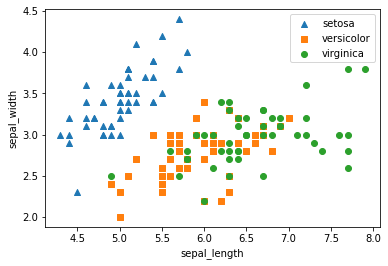

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

markers = ['^','s','o']
for i, marker in enumerate(markers):
    x_axis_data = df_iris[df_iris.target==i]['sepal_length']
    y_axis_data = df_iris[df_iris.target==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_iris1 = df_iris.drop('target',axis=1)
iris_scaled = StandardScaler().fit_transform(df_iris1)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
iris_pca.shape

(150, 2)

In [4]:
pca_columns = ['pca_1','pca_2']
df_iris_pca = pd.DataFrame(iris_pca,columns=pca_columns)
df_iris_pca['target'] = iris.target
df_iris_pca.head()

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [5]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
[과제] 위의 산출물을 시각화해서 출력 및 분류 평가 하세요.(기존 4개의 속성으로 평가한 결과와 비교)

[과제] 신용카드 데이터 세트는 30000개의 레코드와 24개의 속성을 가지고 있으며 'default payment next month' 속성이 Target 값으로 연체일 경우 1, 정상납부가 0이다. 23개의 속성 데이터가 있으나 속성간 상관도가 높을 수 있으므로 통계 및 시각화를 통하여 상관도가 높은 속성을 PCA로 변환한 뒤 6개의 컴포넌트로 cross_val_score로 분류 예측을 수행하세요.(기존 속성을 적용하여 분류한 평가 결과와 비교)